In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
%matplotlib inline
import pandas as pd
from graspy import plot

In [3]:
data_dir = Path('/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/multiview/data')
embed_dir = data_dir / 'embedding'

In [10]:
timestamp = 'T=336-11_31'#'T=319-11_24'
proj_mat_files = [f'fmri_gcca_projection_mat_{timestamp}.csv', f'sc_gcca_projection_mat_{timestamp}.csv', f'clinical_gcca_projection_mat_{timestamp}.csv']

In [65]:
proj_mats = [np.genfromtxt(embed_dir / file, delimiter=',') for file in proj_mat_files]

In [66]:
def ut2mat(ut, n=400):
    uidx = np.triu_indices(n)
    mat = np.zeros((n,n))
    mat[uidx] = ut
    diag = np.diagonal(mat).copy()
    mat += mat.T
    return(mat - np.diag(diag))

In [67]:
for i in [0,1]:
    proj_mats[i] = np.array([ut2mat(ut) for ut in proj_mats[i].T])
proj_mats[2] = proj_mats[2].T

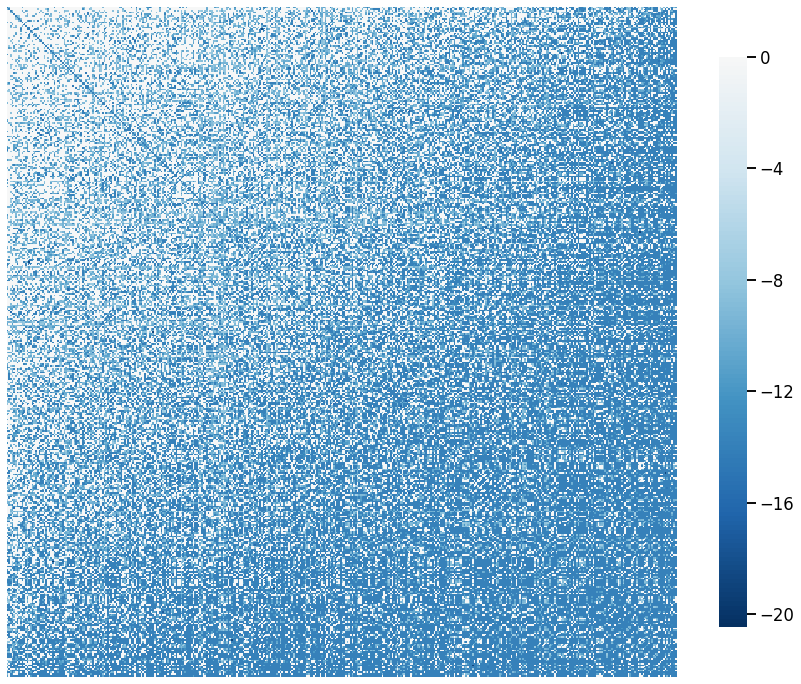

In [130]:
plot.heatmap(proj_mats[1][1,:], figsize=(15,15), transform='log')

In [87]:
fmri0 = proj_mats[0][0,:,:]
nodes0_dist = np.sum(fmri0, axis=0)

(array([16., 31., 60., 52., 49., 69., 71., 27., 17.,  8.]),
 array([-0.02123345, -0.01670333, -0.01217321, -0.00764308, -0.00311296,
         0.00141716,  0.00594729,  0.01047741,  0.01500754,  0.01953766,
         0.02406778]),
 <a list of 10 Patch objects>)

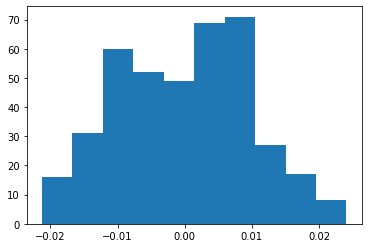

In [88]:
plt.hist(nodes0_dist)

In [107]:
clinical_path = data_dir / 'raw' / 'Cognitive_MedicalFilter.csv'
headers = pd.read_csv(clinical_path).columns.tolist()[3:-6]

In [108]:
headers

['abf_z',
 'att_z',
 'wm_z',
 'vmem_z',
 'fmem_z',
 'smem_z',
 'lan_z',
 'nvr_z',
 'spa_z',
 'eid_z',
 'edi_z',
 'adi_z',
 'abf_s_z',
 'att_s_z',
 'wm_s_z',
 'vmem_s_z',
 'fmem_s_z',
 'smem_s_z',
 'lan_s_z',
 'nvr_s_z',
 'spa_s_z',
 'eid_s_z',
 'edi_s_z',
 'adi_s_z',
 'mot_s_z',
 'sm_s_z']

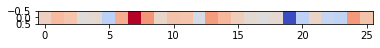

In [102]:
plt.imshow(proj_mats[2][0,:].reshape(1,26), cmap='coolwarm')

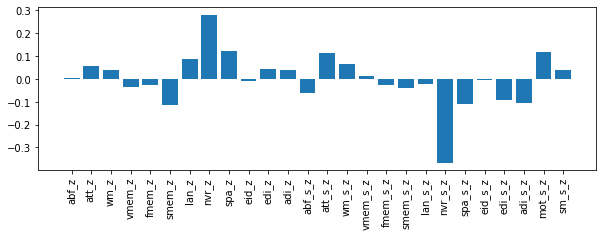

In [125]:
plt.figure(figsize=(10,3))
plt.bar(range(26), proj_mats[2][0,:])
plt.xticks(np.arange(26), headers, rotation=90)
plt.show()